# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


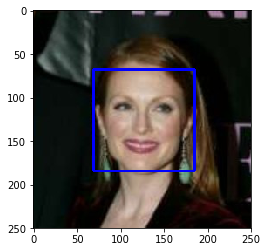

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[50])# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [3]:
img.shape

(250, 250, 3)

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0


### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def check_percent(image_file, detector):
    error = 0
    wrong_index = []
    for i, image in enumerate(image_file):
        if not detector(image):
            wrong_index.append(i)
            error += 1
        percent = (len(image_file)-error)/100
    return wrong_index, percent

wrong_index, percent = check_percent(human_files_short, face_detector)
print("Correct Percentage of first 100 imges, {:2.2%}".format(percent))
print("Total wrong images:{}".format(len(wrong_index)))
wrong_index, percent = check_percent(dog_files_short, face_detector)
print("Correct Percentage of first 100 imges, {:2.2%}".format(percent))
print("Total wrong images: {}".format(len(wrong_index)))


Correct Percentage of first 100 imges, 98.00%
Total wrong image are 2
Correct Percentage of first 100 imges, 17.00%
Total wrong image are 83


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [34]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 117711373.88it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    if img_path is None:
        return None
    pil_img = Image.open(img_path)
    img = data_transform(pil_img).unsqueeze_(0) 
    output = VGG16(img)
    _, preds_tensor = torch.max(output,1)
    return preds_tensor.item() # predicted class index

In [7]:
print(VGG16_predict(dog_files_short[3]))

243


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [43]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    if pred in range(151, 268):
        return True
    return False


In [45]:
print(dog_detector(dog_files_short[3]))

False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [49]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

wrong_index, percent = check_percent(human_files_short, dog_detector)
print("Correct Percentage of first 100 imges, {:2.2%}".format(percent))
print("Total wrong image are  {}".format(len(wrong_index)))
wrong_index, percent = check_percent(dog_files_short, dog_detector)
print("Correct Percentage of first 100 imges, {:2.2%}".format(percent))
print("Total wrong image are  {}".format(len(wrong_index)))

Correct Percentage of first 100 imges, 0.00%
Total wrong image are  100
Correct Percentage of first 100 imges, 83.00%
Total wrong image are  17


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [5]:
import os
import torch
import torchvision.models as models
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
num_workers = 0
batch_size = 64
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')
rgb_3channel_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_data_transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    rgb_3channel_normalization]) 
valid_test_data_transform = transforms.Compose([
    transforms.Resize(size=(256,256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    rgb_3channel_normalization])

train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_data_transform)

print("Number of train_data: {}".format(len(train_data)))
print("Number of valid_data: {}".format(len(valid_data)))
print("Number of test_data: {}".format(len(test_data)))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,num_workers=num_workers, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,num_workers=num_workers, shuffle=False)

print("Number of dog_breed: {}".format(len(train_data.classes)))
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

Number of train_data: 6680
Number of valid_data: 835
Number of test_data: 836
Number of dog_breed: 133


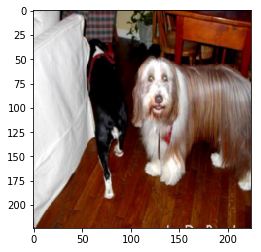

In [6]:
import matplotlib.pyplot as plt              
import numpy as np
%matplotlib inline    
def un_normalize(tensors,mean,std):
    for tensor in tensors:
        for t,m,s in zip(tensor,mean,std):
            t.mul_(s).add_(m)
    return tensor


mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
dataiter = iter(test_loader)
images, label = dataiter.next()
images, label = dataiter.next()
images = un_normalize(images,mean,std)
images.numpy()
plt.imshow(np.transpose(images,(1,2,0)))

In [15]:
images, label = dataiter.next()

In [16]:
images.shape

torch.Size([64, 3, 224, 224])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
I use Resize, RandomResizedCrop for resizing for train data and choose 256 for input tensor because I torchvision model prefer 256 or 244 as an input. RandomHorizontalFlip and RandomRotation for augmenting. I use data augmenting only in traindata to prevent the overfitting the data during training.

Same data transform for valid and test and both using only resize and normalize.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
classess = len(train_data.classes)
use_cuda = torch.cuda.is_available()

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3,stride=2,padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3,stride=2,padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3,padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(128 * 7 * 7, 1000)
        self.fc2 = nn.Linear(1000, classess)
        self.dropout = nn.Dropout(0.25)

    def forward(self,  x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 7 * 7)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

In [8]:
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)

__Answer:__ 

firstly I try with 5 conv layers but after spending 1 around one hours of training the validation loss still over 4.0 and test loss lower than 10% 
Then I change the dropout value, learning rate, stride etc. but test loss is lower than 10%. 
After that, I change to 3 conv layer for better speed and testing for training data. After Adjusting fc1 out_feature start from 500 , 800, 1000 and adjusting fc1 in feature by changing stride and padding. only fc1 out_feature=1000's result have got over 10% of test loss. 
I don't still clearly understand why it like this. 

In my current answers, I use 2 fully conneted layer for output 133 classes. As conv layer, I use 3 layers. 
Actally, I test serveral time with the following code but can't get the validloss less than 4.0.
```
self.conv1 = nn.Conv2d(3, 64, 3,stride=2,padding=1)
self.conv2 = nn.Conv2d(64, 128, 3,stride=2,padding=1)
self.conv3 = nn.Conv2d(128, 256, 3) ```
Then I adjusting server time, by output channel but valid test over 4.0 and testloss lower than 10%.

I thought conv1 with 64 may be affect the results, so , I reduce it to 16 but still valid test over 4.0 and test loss lower than 10%.

This is the last one that I try with  test loss lower than 10%. :(  
```
(conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
with relu activation and pooling 
(conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
with relu activation and pooling 
(conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
with relu activation and pooling
```

pooling layer is 2,2 with stride 2 
```(pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)```

conv3 out channel is 128 and muliply by 3 time pooling with stride and padding -> 7 * 7 
before going from conv to fully connected layer flatten the input 
Then drop out with 0.25
fc1 in feature is 6272 <= (128 * 7 * 7 ) and out feature set to 1000.( I add with 800 and 500 too, not work well in result) 
```(fc1): Linear(in_features=6272, out_features=1000, bias=True)```
relu activation apply to fc1 and apply drop out again.
fc2 in feature with 1000 and out feature set to 133 (total number of training data class)
```(fc2): Linear(in_features=1000, out_features=133, bias=True)```
then return the fc2 result 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [9]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch =optim.SGD(model_scratch.parameters(), lr=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [10]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving Model ......'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.343825 	Validation Loss: 4.269917
Validation loss decreased (inf --> 4.269917). Saving Model ......
Epoch: 2 	Training Loss: 4.300910 	Validation Loss: 4.638744
Epoch: 3 	Training Loss: 4.259300 	Validation Loss: 4.325048
Epoch: 4 	Training Loss: 4.209668 	Validation Loss: 4.400743
Epoch: 5 	Training Loss: 4.181178 	Validation Loss: 4.077090
Validation loss decreased (4.269917 --> 4.077090). Saving Model ......
Epoch: 6 	Training Loss: 4.117984 	Validation Loss: 4.304009
Epoch: 7 	Training Loss: 4.084085 	Validation Loss: 4.154131
Epoch: 8 	Training Loss: 4.058943 	Validation Loss: 4.072368
Validation loss decreased (4.077090 --> 4.072368). Saving Model ......
Epoch: 9 	Training Loss: 4.022753 	Validation Loss: 4.033435
Validation loss decreased (4.072368 --> 4.033435). Saving Model ......
Epoch: 10 	Training Loss: 3.978204 	Validation Loss: 4.081304
Epoch: 11 	Training Loss: 3.894932 	Validation Loss: 3.998673
Validation loss decreased (4.033435 --> 3.998673

In [1]:
!ls

dog_app-cn.ipynb  haarcascades	model_scratch.pt
dog_app.ipynb	  images	README.md


In [10]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [11]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.756151


Test Accuracy: 13% (113/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [3]:
## TODO: Specify data loaders
import os
import torch
import torchvision.models as models
from torchvision import datasets, transforms

num_workers = 0
batch_size = 64
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')
rgb_3channel_normalization = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    rgb_3channel_normalization]) 
valid_test_data_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    rgb_3channel_normalization])

train_data = datasets.ImageFolder(train_dir, transform=train_data_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_data_transform)

print("Number of train_data: {}".format(len(train_data)))
print("Number of valid_data: {}".format(len(valid_data)))
print("Number of test_data: {}".format(len(test_data)))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,num_workers=num_workers, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,num_workers=num_workers, shuffle=False)

print("Number of dog_breed: {}".format(len(train_data.classes)))
loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}


Number of train_data: 6680
Number of valid_data: 835
Number of test_data: 836
Number of dog_breed: 133


In [4]:
dataiter = iter(test_loader)
images, label = dataiter.next()
images.shape

torch.Size([64, 3, 224, 224])

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [5]:
import torchvision.models as models
import torch.nn as nn
last_output= len(train_data.classes)
model_transfer = models.vgg19(pretrained=True)

for param in model_transfer.features.parameters():
    param.requires_grad = False
n_input = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_input,last_output)
model_transfer.classifier[6] = last_layer
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()
    
model_transfer

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
100%|██████████| 574673361/574673361 [00:06<00:00, 95107944.32it/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Actually, I choose inception_v3 because its top 5 error is 6.44 and quite interesting. I developed by reference and setting the image size to 299. Because it requires N *3 * 299 * 299. (https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html) . 

Unfortunately, got cuda run time error out of memory. :( I don't know how to solve it so I change the model to VGG19 with input image size 224. 
just fixing the final layer of output to 133(dog breed class) and train the data.  Got 76% test accuracy.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [6]:
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [5]:
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving Model ......'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

n_epochs=5

# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.776448 	Validation Loss: 0.892477
Validation loss decreased (inf --> 0.892477). Saving Model ......
Epoch: 2 	Training Loss: 1.635522 	Validation Loss: 0.821674
Validation loss decreased (0.892477 --> 0.821674). Saving Model ......
Epoch: 3 	Training Loss: 1.434810 	Validation Loss: 0.665447
Validation loss decreased (0.821674 --> 0.665447). Saving Model ......
Epoch: 4 	Training Loss: 1.342706 	Validation Loss: 0.596398
Validation loss decreased (0.665447 --> 0.596398). Saving Model ......
Epoch: 5 	Training Loss: 1.296078 	Validation Loss: 0.547008
Validation loss decreased (0.596398 --> 0.547008). Saving Model ......


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [6]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [7]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.612826


Test Accuracy: 81% (685/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [7]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [8]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
from PIL import Image
import torchvision.transforms as transforms
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])
data_transfer = {
    'train': train_data,
    'valid': valid_data,
    'test': test_data
}
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


def model_predict(img_path):
    if img_path is None:
        return None
    pil_img = Image.open(img_path)
    img = data_transform(pil_img).unsqueeze_(0) 
    output = model_transfer(img.cuda())
    _, preds_tensor = torch.max(output,1)
    return preds_tensor.item()

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    try:
        return class_names[model_predict(img_path)]
    except IndexError as error:
        return ""

print(predict_breed_transfer(dog_files[2]))

Bulldog


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

You are human!!! But you look like Pharaoh hound  !!!!


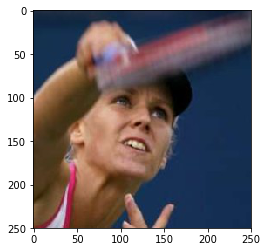

In [9]:
import matplotlib.pyplot as plt   
import cv2                       
import numpy as np
%matplotlib inline  
import torch
import torchvision.models as models

# define VGG16 model
VGG19 = models.vgg19(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG19 = VGG19.cuda()

def un_normalize(tensors,mean,std):
    for tensor in tensors:
        for t,m,s in zip(tensor,mean,std):
            t.mul_(s).add_(m)
    return tensor

def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

def VGG19_predict(img_path):
    if img_path is None:
        return None
    pil_img = Image.open(img_path)
    img = data_transform(pil_img).unsqueeze_(0) 
    output = VGG19(img.cuda())
    _, preds_tensor = torch.max(output,1)
    return preds_tensor.item()
    

def dog_detector(img_path):
    pred = VGG19_predict(img_path)
    if pred in range(151, 268):
        return True
    return False

def img_show(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)
    return imgplot

def run_app(img_path):
    dog_type = predict_breed_transfer(img_path)
    if face_detector(img_path):
        print ("You are human!!! But you look like {}  !!!!".format(dog_type))
        img_show(img_path)
    elif dog_detector(img_path):
        print ("Oh my lovely puppy. I think you are {}  !!!!".format(dog_type))
        img_show(img_path)
    else:
        print ("We can't detect you. Sorry")
        img_show(img_path)
        
    
run_app(human_files[200])

You are human!!! But you look like Irish water spaniel  !!!!


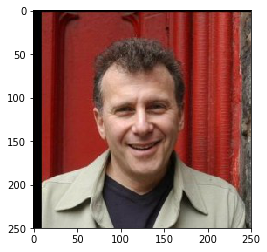

In [21]:
run_app(human_files[30])

Oh my lovely puppy. I think you areMastiff  !!!!


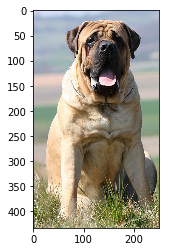

In [22]:
run_app(dog_files[2])

Oh my lovely puppy. I think you areGerman pinscher  !!!!


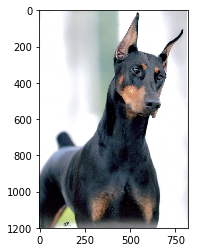

In [23]:
run_app(dog_files[100])

Oh my lovely puppy. I think you areIrish water spaniel  !!!!


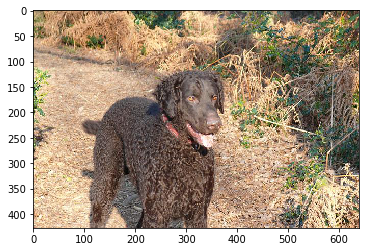

In [24]:
run_app(dog_files[130])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

1.  Can't test with .png file (because of 4 channel) adding for 4 channel and train again we get a better real project. 
2. My current dog detector is using vgg19 pretrain model. I feel it doesn't work well. If I improve and testing again with dog detector with other pretrain model like Densenet and Inception v3, I will get more accurate result. 
3. My model_transfer training with only 5 epoches and stop but validation loss contining still drop. If I increase the number of epoch, I will get more accurate result I think.
4. I use the original Face Detecor and sample dog detector. It work well but a photo with dog and human, we should mentioned both human and dog. My current algorithm detect the face and return as human. I should check both dog and human result and generate the total count. 

We can't detect you. Sorry


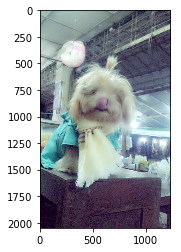

In [21]:
run_app('/home/workspace/dog_project/img3.JPG')

You are human!!! But you look like Dogue de bordeaux  !!!!


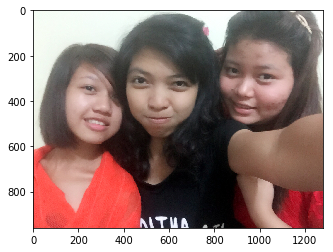

In [29]:
run_app('/home/workspace/dog_project/img1.JPG')

We can't detect you. Sorry


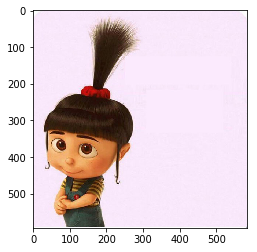

In [24]:
run_app('/home/workspace/dog_project/img4.JPG')

You are human!!! But you look like Italian greyhound  !!!!


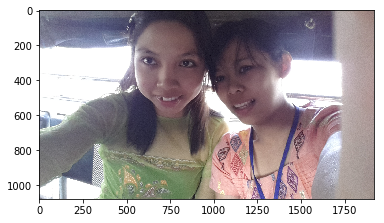

In [25]:
run_app('/home/workspace/dog_project/img5.JPG')

You are human!!! But you look like Bull terrier  !!!!


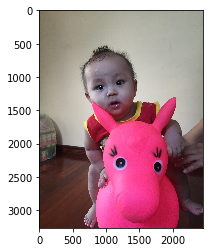

In [27]:
run_app('/home/workspace/dog_project/img6.JPG')

You are human!!! But you look like Havanese  !!!!


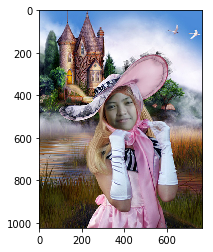

In [28]:
run_app('/home/workspace/dog_project/.JPG')

You are human!!! But you look like Havanese  !!!!


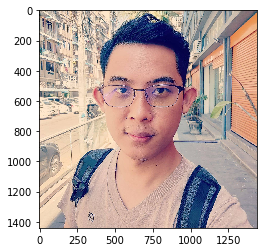

In [31]:
run_app('/home/workspace/dog_project/chan.jpg')

You are human!!! But you look like Dogue de bordeaux  !!!!


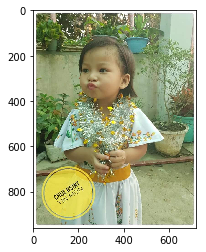

In [10]:
run_app('/home/workspace/dog_project/babyyu.jpg')

You are human!!! But you look like Maltese  !!!!


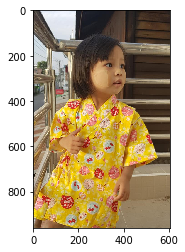

In [11]:
run_app('/home/workspace/dog_project/chueshint.jpg')

Oh my lovely puppy. I think you are Bull terrier  !!!!


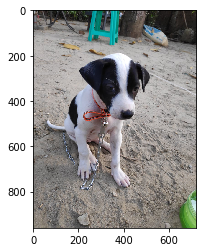

In [12]:
run_app('/home/workspace/dog_project/dog1.jpg')

Oh my lovely puppy. I think you are Bull terrier  !!!!


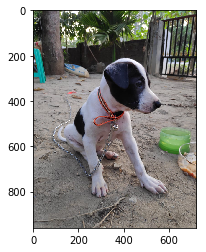

In [13]:
run_app('/home/workspace/dog_project/dog2.jpg')

You are human!!! But you look like Great pyrenees  !!!!


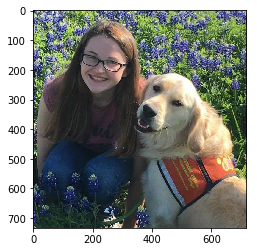

In [14]:
run_app('/home/workspace/dog_project/dogandhuman.jpg')

You are human!!! But you look like Bull terrier  !!!!
You are human!!! But you look like Dachshund  !!!!
You are human!!! But you look like Poodle  !!!!
Oh my lovely puppy. I think you are Bullmastiff  !!!!
Oh my lovely puppy. I think you are Mastiff  !!!!
We can't detect you. Sorry


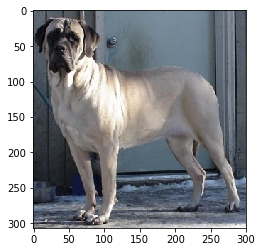

In [28]:
## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)